### Emerging Technolgoies Final Year Project

***

### Project Overview
This notebook contains an overview of the scikit learn libary aswell as demonstrations and explantions of alogrithms that interested me.
<br>
Algorithms being examined are:
<br>
&emsp; Regression:
<br>
 &emsp; &emsp;  Ordinary Least Squares
<br>
  &emsp; &emsp; Lasso
<br>
  &emsp; &emsp;  Ridge regression
<br>
  &emsp; &emsp;  Elastic net regression

<br>

### Scikit Learn 

***

What is scikit learn? Scikit learn is machine learning libary in python language. its compromised of pre-defined implementations of common machine learning languages for both supervised learning and un-supervised learning.
Supervised learning is training computers on labled data where unsupervised learning the computer teachs itself based on certain criteria.
Deals with different type of algorithms  regression,classifcation,clustering and dimesionality reudction alogrithms.
regression is has been defined as above
Clustering finds natura occuring groups or clusters in data.
classifcation is using a label to indentify data
Dimesionality reduction is trying too size down the amount of varialbes or (dimesions) of the data.

#### what is regression ? 
One way of defining regression is "a process for determining a line or curve that best represents the general trend of a data set" simply but it helps model relationships based on independent variables and a predictor variable. Take for example a dataset that contains the price,mileage,year, and horsepower of car . price would be the predictor variable, the indepdent variables would be car,mileage year. A Regression model in this context would measure how a change in ,mileage,year and model would effect the price. 

#### what is oridnary least squares regression ? 
One defintion of oridnary least squares (OLS for short) is as follows "(OLS) regression: a technique in which a straight line is used to estimate the relationship between one or more independent variable to estimate predictor variable.The line that minimizes the the distance between the line and each point from the data set(The line that minimizes the sum of the squared errors ) is said to be the "best-fitting line. the equation for ols can be represent as follows

 &emsp; &emsp; $ ŷ_{i} = b_{0} + b_{1}x_{1i}  +.... b_{k}x_{ki}$


### OLS equation explained
buidling on the example above:
<br>
  &emsp;$ŷ$ = predicted value of price 
<br>
 &emsp;$b_{0}$ = the y intercept when the sum of each independent variable (mileage,year,horsepower) is 0
<br>
 &emsp;$b_{1}$ = slope of the line with price as the dependent variable and mileage as independent variable
<br>
 &emsp;$x_{1}$ =  independent variable mileage
<br>
 &emsp;$b_{2}$ = slope of the line with price as the dependent variable and year as independent variable
<br>
 &emsp;$x_{2}$ =  independent variable year
<br>
 &emsp;$b_{3}$ = slope of the line with price as the dependent variable and horsepower as independent variable
<br>
 &emsp;$x_{3}$  = independent variable year
<br>

$b_{0}$ - $b_{3}$  are known as beta regression coefficents. 
<br>
another way to consider regression cofficents is as follows,
if we take b1 for example, the b1 regression cofficent would measure how an increase of the milage by 1 kilometer (1 unit) effects the price of the car. and by doing this we get an idea of how each independent variable effects the price allowing us in theory for a model to make an accurate prediction for the price.
<br>
The $_k$ notation is denoating that each independent variable in the data set and its regression coffecient are to be included
<br>
The $_i$ notation is denoating that each value for the variable in the data set is to be included

The equation for calculating b0:
$b_{0} = ȳ - b_{1}x_{1i} .... -
b_{k}x_{ki}$

equation for calculating b1:
$b_{1} =\frac{\sum_{i=1}^{n}(x_{i}-x̄)(y_{i}-ȳ)}{\sum_{i=1}^{n}(x-x̄^{2})}$

In [58]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn.model_selection as mod 

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
import sklearn.linear_model as lm
import sklearn.metrics as skm
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


SyntaxError: invalid syntax (<ipython-input-58-0469c7337ea6>, line 19)

In [2]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

<br>

### Ordinary Least square regression

***

In [3]:
# Load Data into dataframe
url = "https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-white.csv"
df = pd.read_csv(url, sep = ";")

In [4]:
# Display dataframe
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

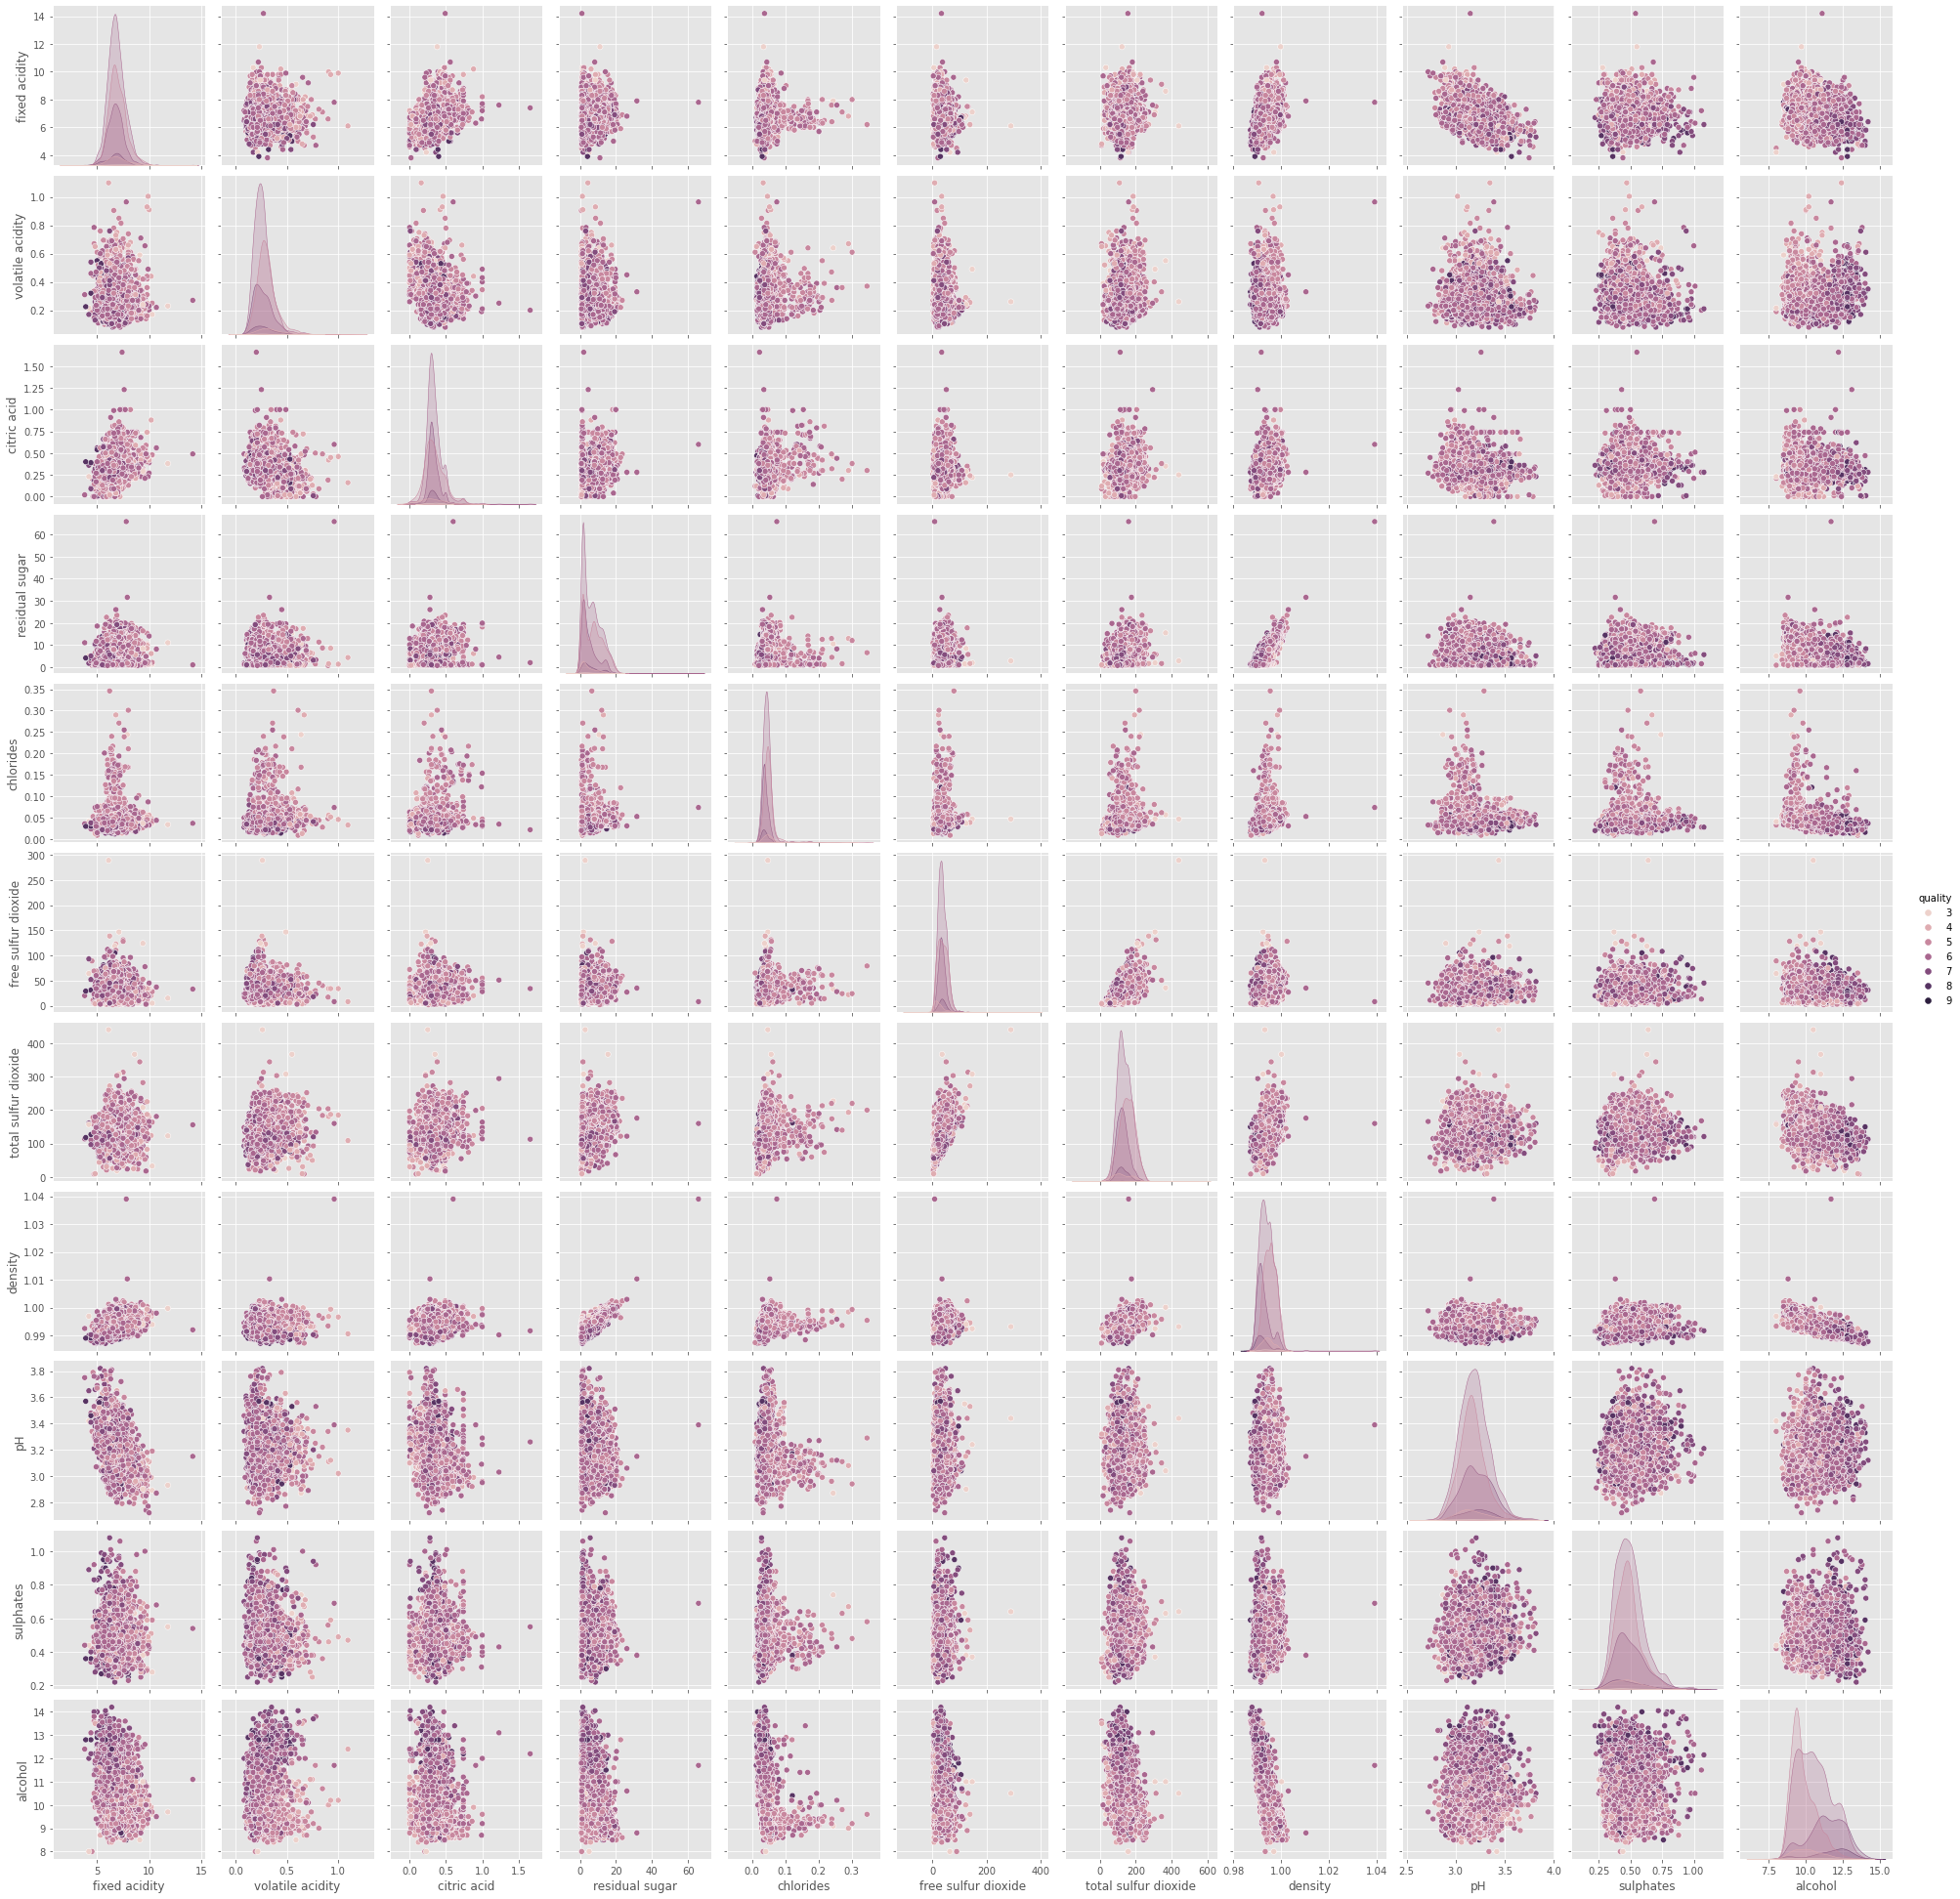

In [5]:
# Scatter plots and kdes.
sns.pairplot(df,hue='quality');

<function matplotlib.pyplot.show(close=None, block=None)>

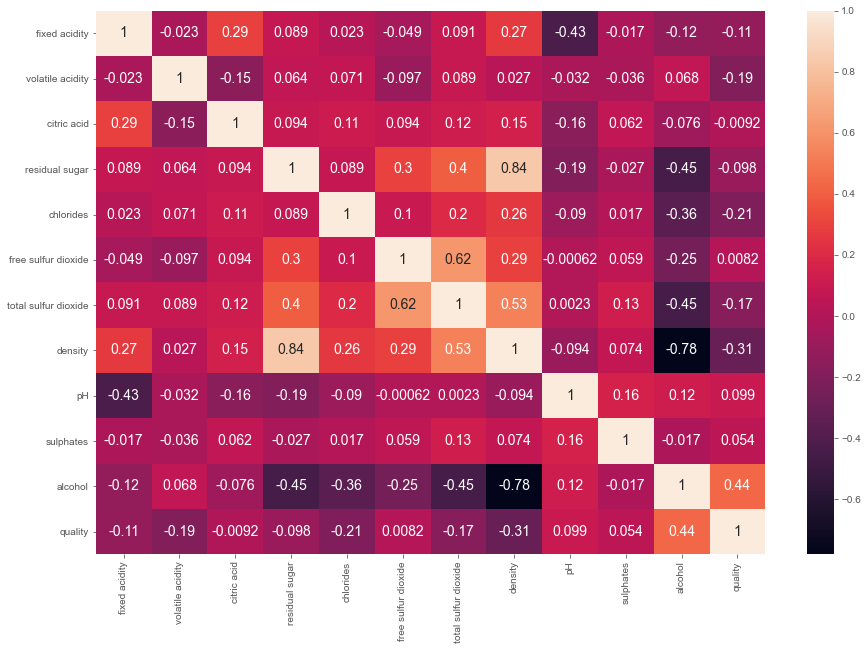

In [6]:
# Heat man to show corelation between independent and dependent variables
sns.heatmap(df.corr(),annot=True, annot_kws={'size': 14})
sns.set_style('whitegrid')
plt.show

In [7]:
# define predictor and response variables
X = df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides", "free sulfur dioxide", "total sulfur dioxide", "density","pH","sulphates","alcohol"]]

y = df["quality"]

In [8]:
# split the data into training sets
X_train, X_test, y_train, y_test = mod.train_test_split(X, y, test_size = 0.5, random_state =0)

In [9]:
# define the model
OLS = LinearRegression()

In [10]:
# fit the data to to the model
OLS.fit(X,y)

LinearRegression()

In [11]:
# size of the test data
y_test.size

2449

In [12]:
# using the test data predict the y values 
y_pred = OLS.predict(X_test)

In [13]:
# size of the y predictions
y_pred.size

2449

In [14]:
# check the models accuracy
OLS.score(X,y)

0.2818703641332847

In [15]:
# varation in the dependent variables from  the indepedent
r2_score(y_test, y_pred)

0.2802099383453225

In [16]:
# Average square distance from the estimated and actual values
skm.mean_squared_error(y_test, y_pred) 

0.5735723486346025

<br>

### Ridge Regression

***

In [17]:
# LOAD DATA
url = "https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv"
df = pd.read_csv(url, sep = ";")

In [18]:
# display data
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [19]:
## descirbe details of the data
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

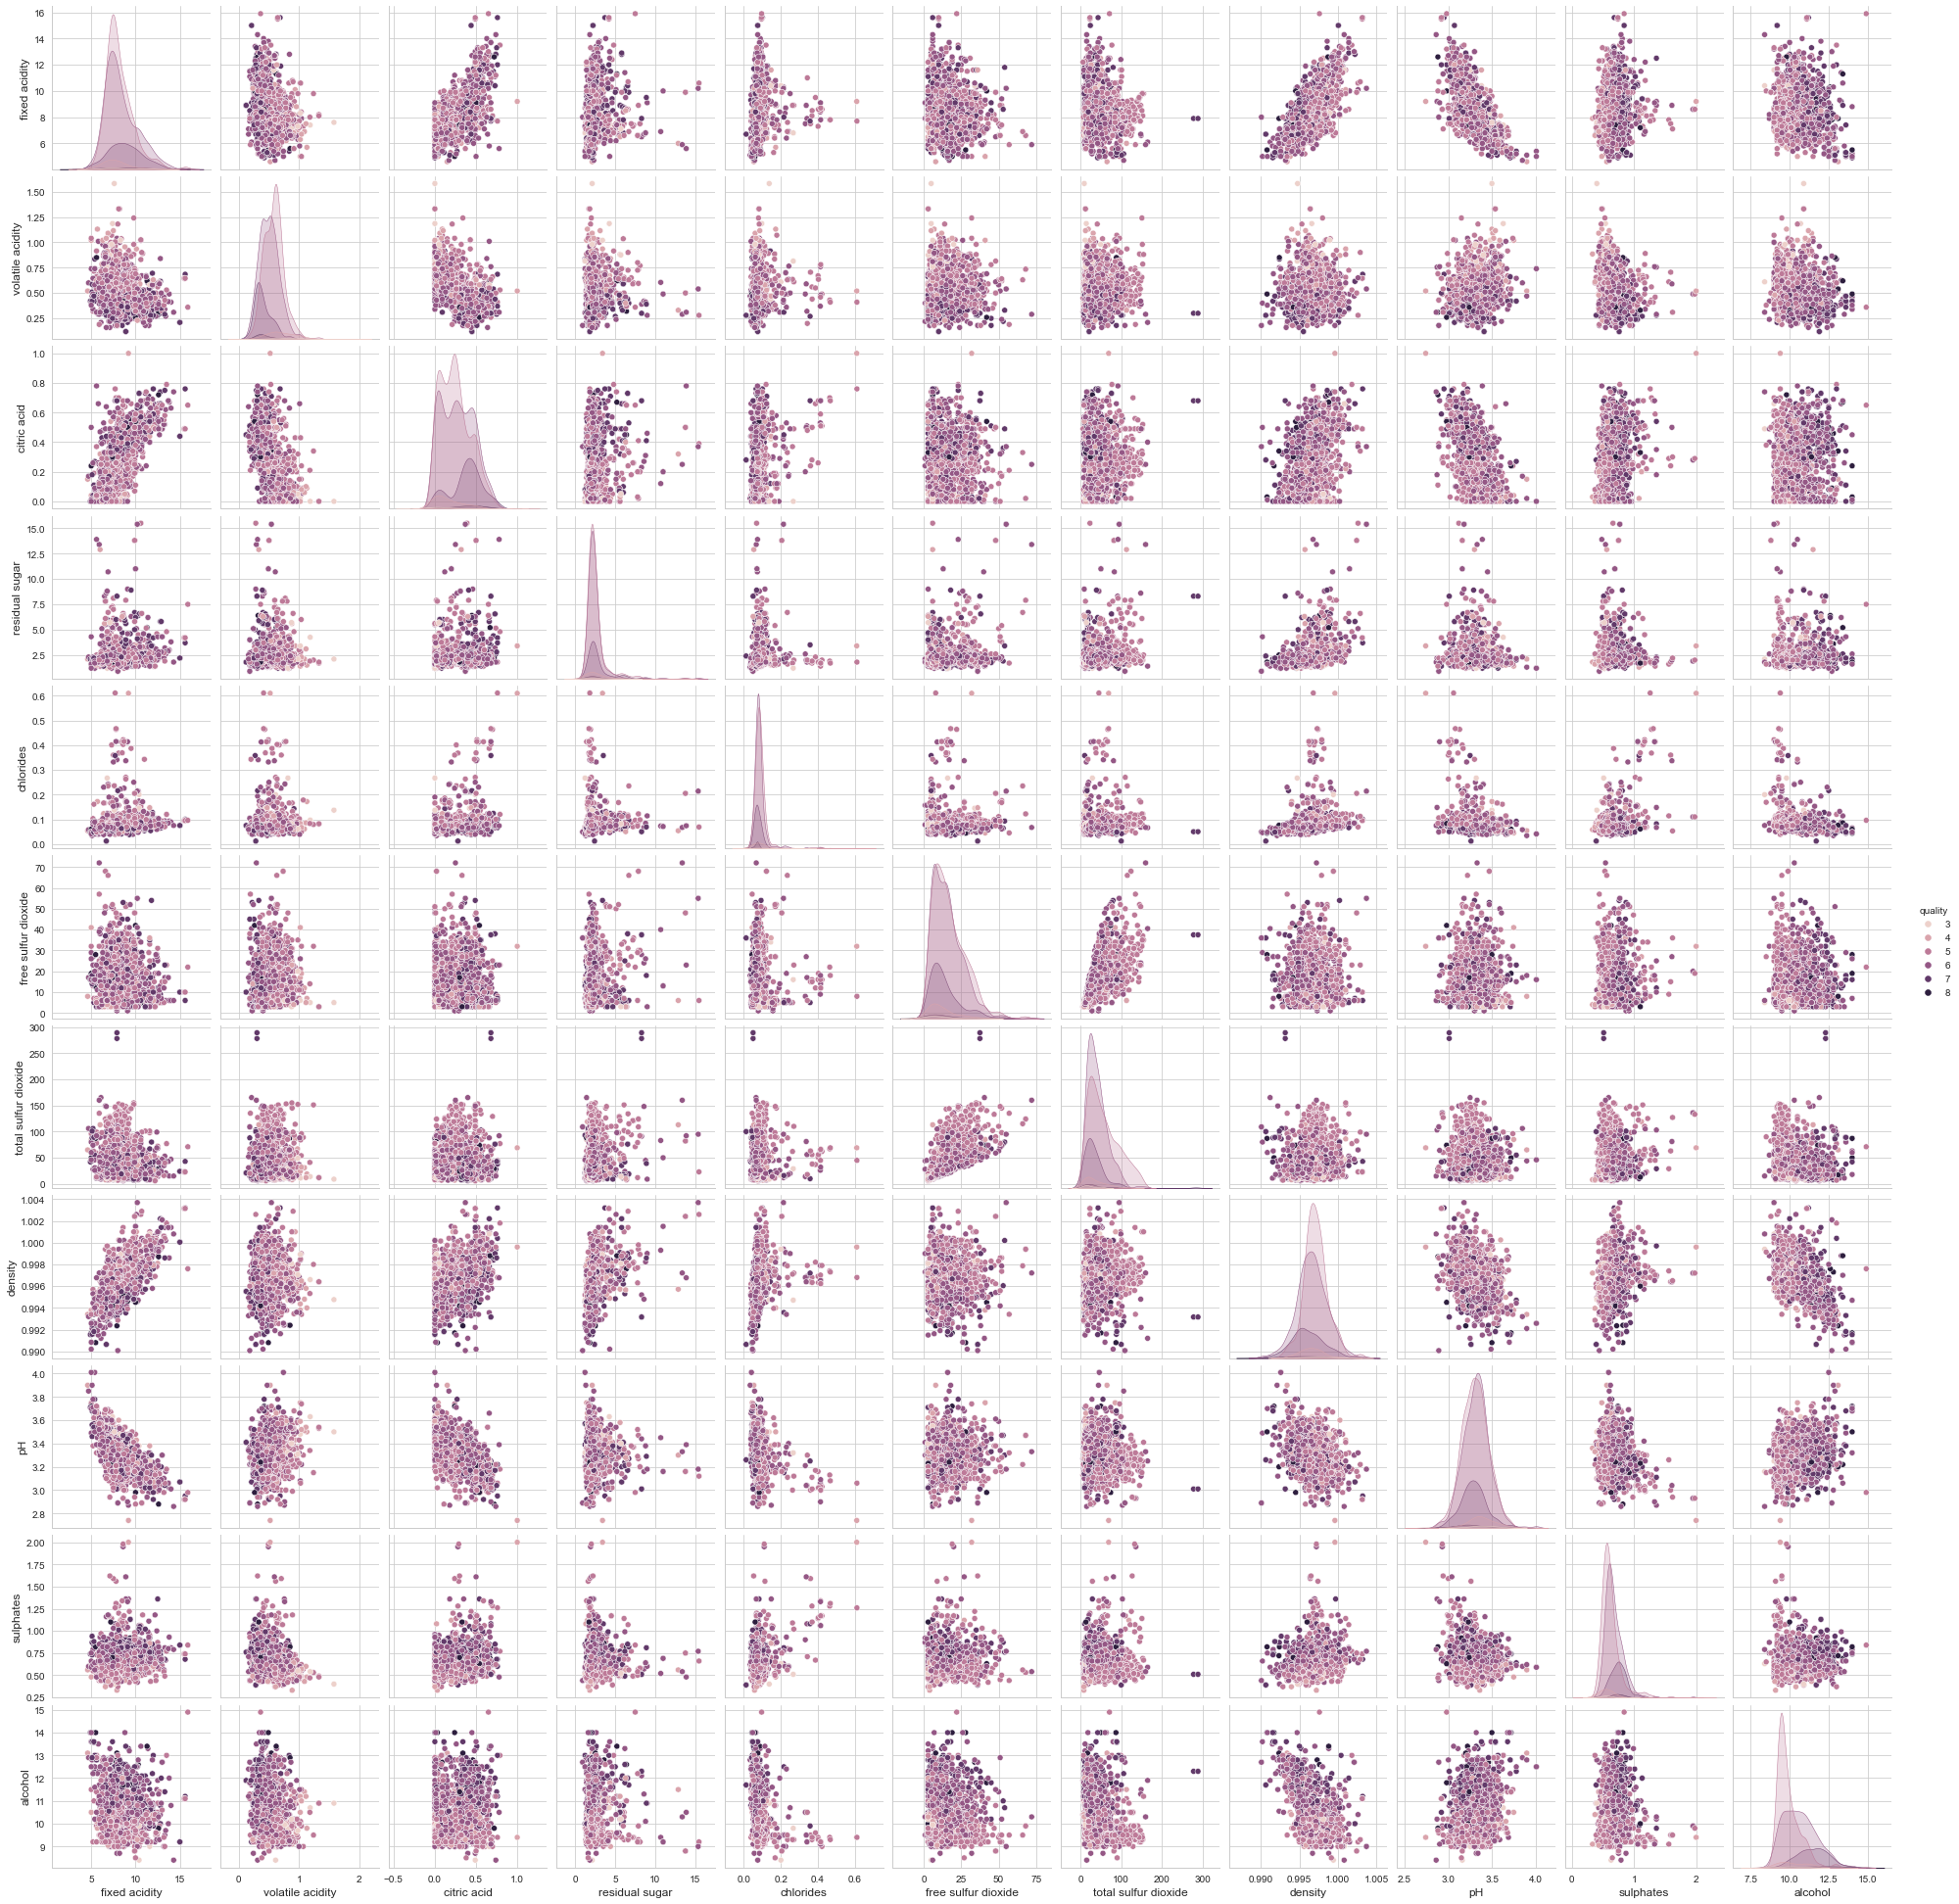

In [20]:
# Scatter plots and kdes.
sns.pairplot(df,hue='quality');

<function matplotlib.pyplot.show(close=None, block=None)>

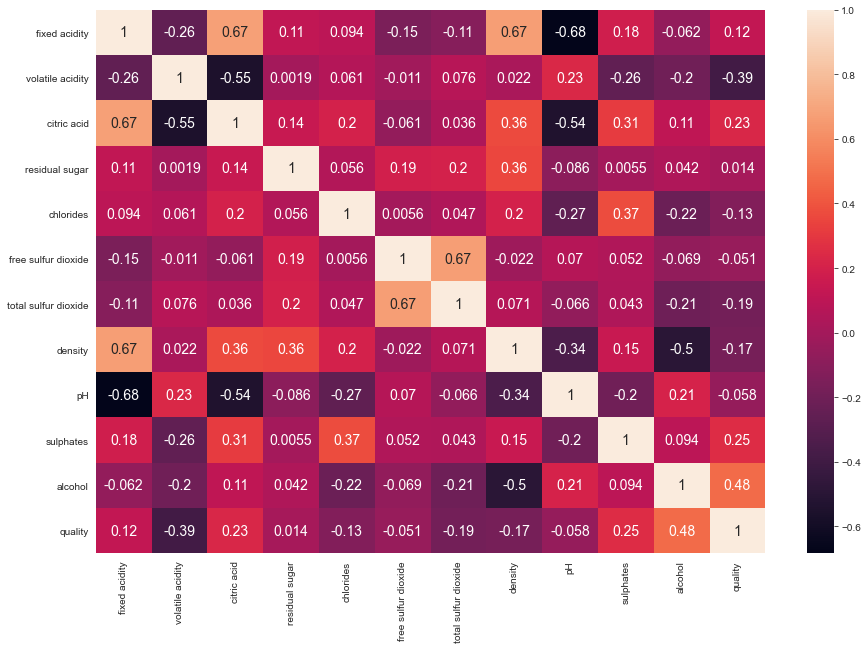

In [21]:
# Heat man to show corelation between independent and dependent variables
sns.heatmap(df.corr(),annot=True, annot_kws={'size': 14})
sns.set_style('whitegrid')
plt.show

In [22]:
#define predictor and response variables
X = df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides", "free sulfur dioxide", "total sulfur dioxide", "density","pH","sulphates","alcohol"]]

y = df["quality"]

#define cross-validation method to evaluate model
reg_cv = RidgeCV(alphas=[0.1,1.0,10.0])

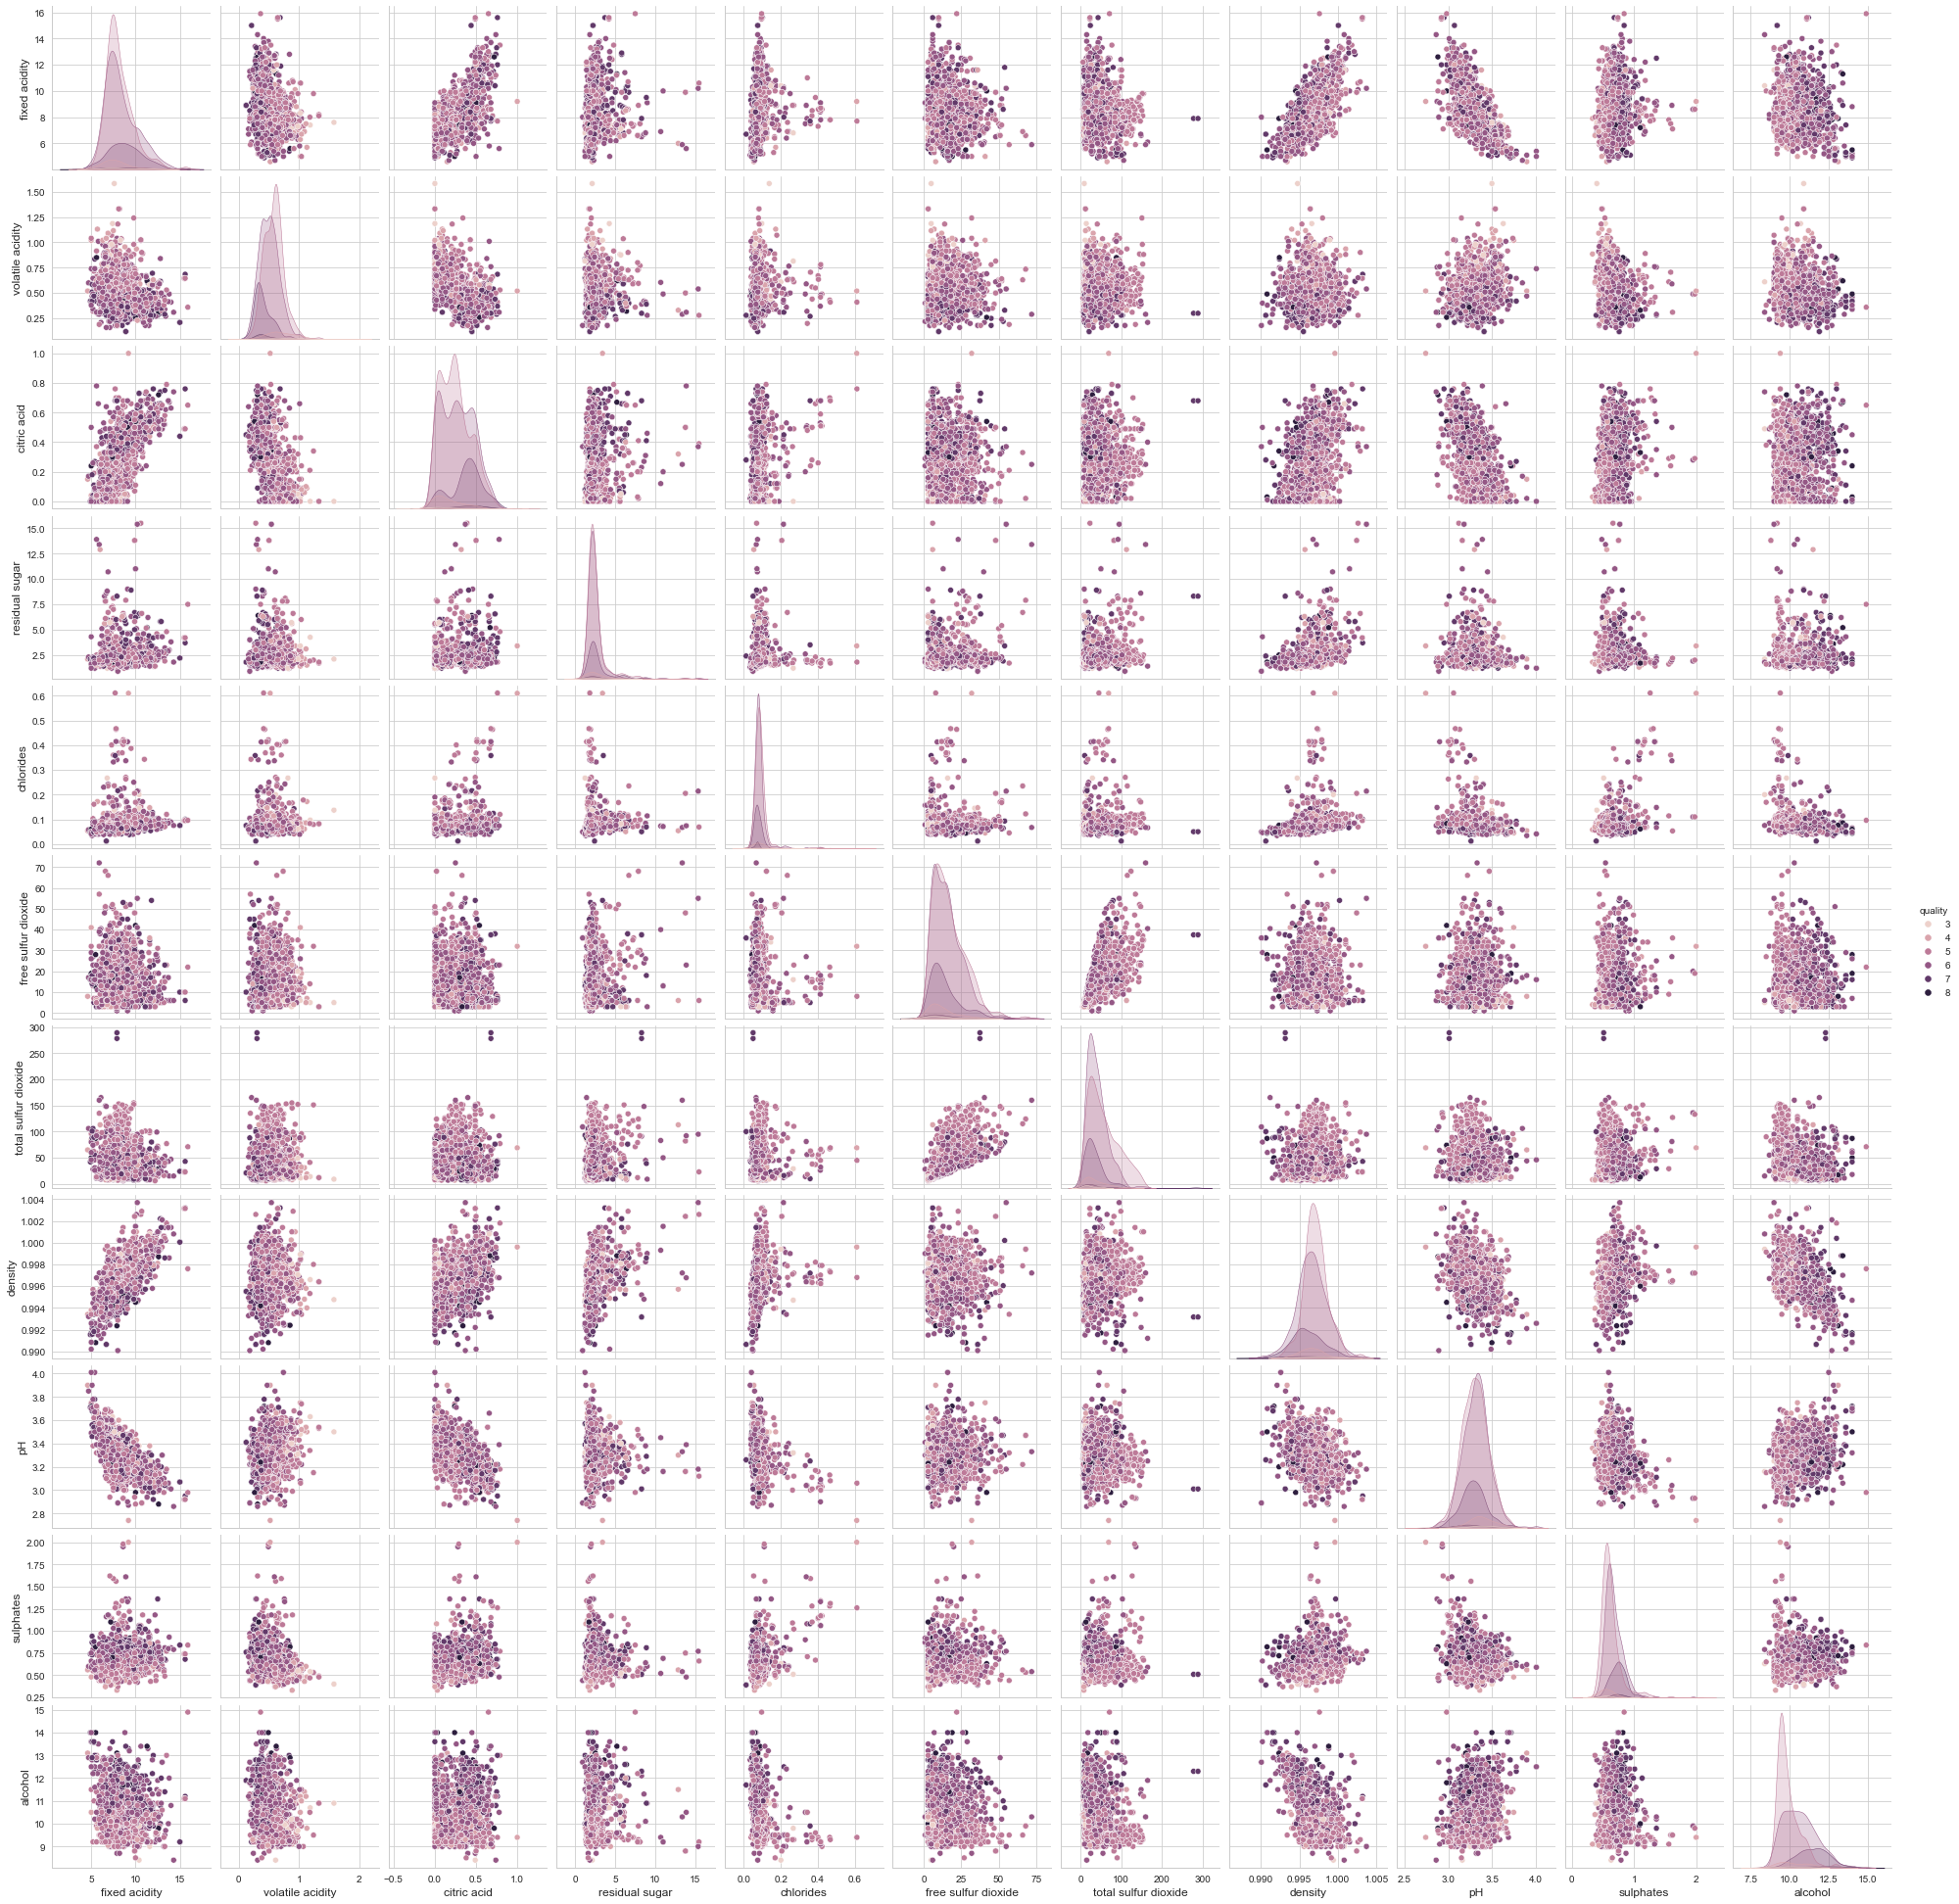

In [23]:
# Scatter plots and kdes.
sns.pairplot(df,hue='quality');

In [24]:
# split the data into training sets
X_train, X_test, y_train, y_test = mod.train_test_split(X, y, test_size = 0.5, random_state =0)

In [25]:
#fit model to the data
model = reg_cv.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
print(model.alpha_)

0.1


In [26]:
# dependent variable based on training data
y_pred = model.predict(X_test)

In [27]:
# dependent variable values
y_pred

array([5.73034512, 5.060289  , 6.60040832, 5.40286326, 5.88709124,
       5.1071358 , 5.43845555, 5.94267546, 4.81615956, 4.99749702,
       5.35983356, 5.49671859, 5.78840106, 5.08333247, 5.5646804 ,
       6.40435066, 6.86211589, 5.85933322, 5.95471016, 5.11704551,
       6.34606242, 5.20286273, 5.61735388, 6.3295719 , 5.53415094,
       5.00534402, 5.21900086, 6.55996873, 5.34594013, 6.19225615,
       6.11055032, 5.89961899, 5.48500012, 5.30555456, 5.72712443,
       6.28852265, 5.22528927, 5.47168338, 6.38912066, 5.78783045,
       5.44314786, 6.10925528, 6.75789212, 6.59062139, 6.07264555,
       4.80111129, 5.55742315, 6.01691758, 5.53860672, 6.11046871,
       5.4050272 , 5.41508703, 5.87755457, 6.38993024, 5.71304315,
       5.18503063, 5.09818305, 5.33535156, 6.51889618, 5.46081236,
       5.1568588 , 5.78436908, 6.04377486, 6.35772807, 5.05101362,
       6.14656516, 5.39673636, 6.00370032, 6.14671807, 6.12491152,
       5.2938783 , 5.49212973, 5.05387867, 5.58456267, 5.65801

In [28]:
# training dataset
X_test

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1109           10.8             0.470         0.43            2.10      0.171   
1032            8.1             0.820         0.00            4.10      0.095   
1002            9.1             0.290         0.33            2.05      0.063   
487            10.2             0.645         0.36            1.80      0.053   
979            12.2             0.450         0.49            1.40      0.075   
...             ...               ...          ...             ...        ...   
1551            7.1             0.670         0.00            2.30      0.083   
566             8.7             0.700         0.24            2.50      0.226   
1347            7.2             0.655         0.03            1.80      0.078   
982             7.3             0.520         0.32            2.10      0.070   
798             9.4             0.500         0.34            3.60      0.082   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1109                 27.0                  66.0  0.99820  3.17       0.76   
1032                  5.0                  14.0  0.99854  3.36       0.53   
1002                 13.0                  27.0  0.99516  3.26       0.84   
487                   5.0                  14.0  0.99820  3.17       0.42   
979                   3.0                   6.0  0.99690  3.13       0.63   
...                   ...                   ...      ...   ...        ...   
1551                 18.0                  27.0  0.99768  3.44       0.54   
566                   5.0                  15.0  0.99910  3.32       0.60   
1347                  7.0                  12.0  0.99587  3.34       0.39   
982                  51.0                  70.0  0.99418  3.34       0.82   
798                   5.0                  14.0  0.99870  3.29       0.52   

      alcohol  
1109     10.8  
1032      9.6  
1002     11.7  
487      10.0  
979      10.4  
...       ...  
1551      9.4  
566       9.0  
1347      9.5  
982      12.9  
798      10.7  

[800 rows x 11 columns]

In [29]:
# size of the dependent varialbes actual and predict value
print(y_test.size,y_pred.size)

800 800


In [30]:

# accurcy of prediction
model.score(X,y)

0.3530993687347408

In [31]:

# varation in the dependent variables from  the indepedent
r2_score(y_test, y_pred)

0.30306890261302055

In [32]:
# Average square distance from the estimated and actual values
skm.mean_squared_error(y_test, y_pred) 

0.42714906958847965

In [33]:
# information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [34]:
# check for null values
df.isnull().sum().sum()

0

In [35]:
# check for unique values
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [36]:
# correlation table
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

<br>

### Lasso Regression

***

In [37]:
#LOAD DATA
url1 = "https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/master/housing.csv"

In [38]:
df = pd.read_csv(url1, sep = ",")

In [39]:
# display data
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [40]:

#define predictor and response variables
X = df[["longitude","latitude","housing_median_age","total_rooms","population","households","median_income"]]
#X1 = df2[["longitude", "latitude", "housing_median_age", "total_rooms","total_bedrooms","population", "households","median_income"]]
y = df["median_house_value"]


In [41]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

<function matplotlib.pyplot.show(close=None, block=None)>

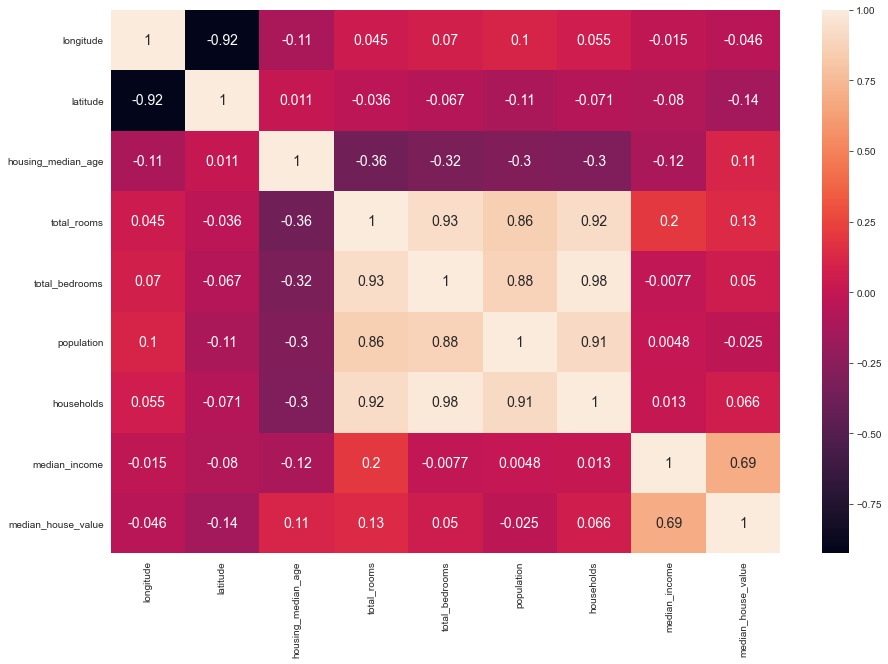

In [42]:
# heat map for correlation of indepedent variables to dependent variable
sns.heatmap(df.corr(),annot=True, annot_kws={'size': 14})
sns.set_style('whitegrid')
plt.show

In [43]:
# split data
X_train, X_test, y_train, y_test = mod.train_test_split(X, y, test_size = 0.5, random_state =0)

In [44]:
#define model
reg_cv1 = LassoCV(alphas=[6000])

model = reg_cv1.fit(X_train, y_train)

print(model.alpha_)

6000


In [45]:
# preidcted value for the independent variable
y_pred = model.predict(X_test)

In [46]:
y_pred.size

10320

In [47]:
y_test

14740    136900.0
10101    241300.0
20566    200700.0
2670      72500.0
15709    460000.0
           ...   
16618    186200.0
9880     118800.0
4174     241700.0
15617    500001.0
19761     59000.0
Name: median_house_value, Length: 10320, dtype: float64

In [48]:
# accuracy of the model
model.score(X,y)

0.6125176050016646

In [49]:
# varation in the dependent variables from  the indepedent
r2_score(y_test, y_pred)

0.6124905276333702

In [50]:
# Average square distance from the estimated and actual values
skm.mean_squared_error(y_test, y_pred) 

5189942114.805699

<br>

### ElasticNet Regression

***

In [51]:
url = "https://raw.githubusercontent.com/Ankit152/Fish-Market/main/Fish.csv"

In [52]:
# data frame
df = pd.read_csv(url, sep = ",")

In [53]:
df

Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]

In [54]:
# define predictor and response variables
X = df[["Length1", "Length1", "Length2","Length3","Height","Width"]]
y = df["Weight"]

In [57]:
# build the model
model = ElasticNet(alpha = 0.5)

NameError: name 'ElasticNet' is not defined

In [ ]:
# split the data 
X_train, X_test, y_train, y_test = mod.train_test_split(X, y, test_size = 0.5, random_state =0)

In [ ]:
# heat map for correlation between independent and dependent variables
sns.heatmap(df.corr(),annot=True, annot_kws={'size': 14})
sns.set_style('whitegrid')
plt.show

In [ ]:
# fit the model to the data
model.fit(X,y)

In [ ]:
# predicted value from the indepedent varibles
y_pred = model.predict(X_test)

In [ ]:
# score the model
model.score(X,y)

In [ ]:
# varation in the dependent variables from  the indepedent
r2_score(y_test, y_pred)

In [ ]:
# Average square distance from the estimated and actual values
skm.mean_squared_error(y_test, y_pred) 

END